Une etude des lois de Kepler


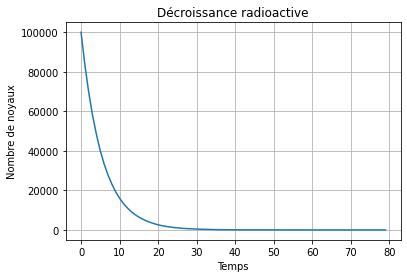

In [ ]:
'''Programme qui permet de simuler une désintégration aléatoire à partir du tirage d'un nombre de dés donnés'''

#Importation des librairies et modules
import random #Librairie qui permet d'utiliser la fonction randint qui tire un entier au hasard compris entre deux bornes
import matplotlib.pyplot as plt

#Fonction qui permet d'afficher le nombre de dés restant en fonction du nombre de lancés
def affichageCourbe(historiqueNbDes) :
    plt.plot([float(y) for y in historiqueNbDes])
    plt.grid(True)                          #Affichage la grille
    plt.title("Décroissance radioactive")   #Titre de la courbe
    plt.xlabel("Temps")                     #Titre de l'axe des abscisses
    plt.ylabel("Nombre de noyaux")          #titre de l'axe des ordonnées
    plt.show()

nbDesDepart = 100000  #Nombre de dés à lancer
nbFaces = 6     #Nombre de faces de chaque dé
DESINTEGRE = 1  #Valeur de la face du dé qui le désintégre

'''
Définition de la Fonction qui tire un nombre de dés quelconque et détermine combien il en reste qui ne se sont pas désintégrés (ont fait un "1")
Entrée : nombreDesInitial : entier représentant le nombre de dés à tirer
Sortie : entier représentant le nombre de dés qui n'ont pas donné "1"
'''
def tireLesDes(nombreDesInitial) :
    nbDes = nombreDesInitial   #Au début aucun dé n'est désintégré
    for i in range(nombreDesInitial) :
        valeurDe = random.randint(1, nbFaces)
        if valeurDe == DESINTEGRE :
            nbDes = nbDes - 1
    return nbDes

#Programme principal
nbDes = nbDesDepart         #Au départ tous les dés sont "vivants"
historiqueNbDes = [nbDes]   #Liste contenant le nombre de dés restants après chaque étape

while nbDes > 0 :                   #Tant qu'il reste des dés, on effectue le tirage
    nbDes = tireLesDes(nbDes)       #On tire les dés et détermine combien il en reste
    historiqueNbDes.append(nbDes)   #On rajoute le nombre de dés restant à l'historique

#C'est fini, il ne reste plus de dés
affichageCourbe(historiqueNbDes)    #On affiche la courbe


In [2]:
from vpython import *

# Define planet data: distance from the Sun (in AU) and orbital period (in Earth years)
planet_data = {
    "Earth": {"distance": 1.0, "period": 1.0},
    "Jupiter": {"distance": 5.2, "period": 11.86},
    "Saturn": {"distance": 9.58, "period": 29.46},
    "Neptune": {"distance": 30.05, "period": 164.8}
}

# Create a function to calculate the angle of each planet
def calculate_angle(period, time):
    return 2 * pi * (time / period)

# Create the Sun
sun = sphere(pos=vector(0, 0, 0), radius=0.8, color=color.yellow, emissive=True)

# Create the planets
planets = {}
for planet, data in planet_data.items():
    distance = data["distance"]
    period = data["period"]
    angle = calculate_angle(period, 0)
    x = distance * cos(angle)
    y = distance * sin(angle)
    planets[planet] = sphere(pos=vector(x, y, 0), radius=0.3, color=color.white, emissive=True)
    planets[planet].label = label(pos=planets[planet].pos, text=planet, xoffset=10, yoffset=10, height=16, border=6, font='sans')

# Animation loop
t = 0
dt = 0.01
while True:
    rate(100)
    t += dt
    for planet, data in planet_data.items():
        distance = data["distance"]
        period = data["period"]
        angle = calculate_angle(period, t)
        x = distance * cos(angle)
        y = distance * sin(angle)
        planets[planet].pos = vector(x, y, 0)
        planets[planet].label.pos = planets[planet].pos


ModuleNotFoundError: No module named 'visual'